# Airline Delay Analysis

### Analysis Introduction:

For this analysis I wanted to tackle the challenge that is flight delays and see if they can be predicted using machine learning algorithms. In this analysis I performed data cleaning, preprocessing, and model evaluation to come up with a recommendation for airlines who could benefit from increased oversight on their flights.

Models Evaluated include:
* XGBoost
* RandomForest
* Logistic Regression 

Metrics Evaluated include but are not limited to:
* Flight Year, Month, Day
* Carrier 
* Origin/Destination
* Departure Times
* Taxi Times 
* Airtime and Distance Traveled 

These metrics were selected because they provide the best insight into flight delays and will be encoded properly to work with our selected models.

First, we will start our analysis by importing neccesary packages.

In [3]:
#Importing packages needed for analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

Loading in 2019 data subset:

In [4]:
#Reading in data 
df_2019 = pd.read_csv('2019.csv')

In [5]:
#Checking to see how much flight data is in this year
df_2019.shape

(7422037, 21)

We can see that with +7.4 million datapoints, if the entire dataset was loaded in (2010-2019) over +60 million flights would need to be analyzed and sorted. Due to lack of computing power I took a subset of the dataset for my analysis. 

In [6]:
#Setting counts variable to see which airports have the most flight volume
counts = df_2019.groupby('ORIGIN')['ORIGIN'].count()

#Sorting the top 10 airports by volume and assigning a variable to that list
big_airports = counts.sort_values(ascending=False).head(10)
airport_names = big_airports.index
airports = airport_names.tolist()

Due to the sheer volume of data, I sorted the top 10 airports and wanted to view flights whose origin and destination were in that list

In [7]:
#Setting the dataframe to only contain flights by top 10 airport volume
df_2019 = df_2019.loc[df_2019['ORIGIN'].isin(airports) & df_2019['DEST'].isin(airports)]

In [6]:
#Setting Lists for easier manipulation later on
# df_list = [df_2015, df_2016, df_2017, df_2018, df_2018, df_2019]
df_list = [df_2019]
# df_list_train = [df_2015, df_2016, df_2017, df_2018]

# Exploratory Analysis: 
Please do not run through this code. The code below analyzes 2009 data to root out Null values and performes cleaning on just 2009 data. Please proceed to the next markdown if you would like to run through this project.

In [ ]:
df_2009.info()

In [ ]:
df_2009['DEST'].unique()

In [ ]:
US_Airports = ["DCA", "EWR", "IAD", "ATL", "CLE", "ORD", "BWI", "GSO", "JAN", "IAH", "MSP", "JAX", "CRP", "PIT", "TYS", "ALB", "OKC",
"MCI", "CHS", "BHM", "ABQ", "ORF", "RSW", "BUF", "IND", "COS", "MAF", "CLT", "DTW", "CVG", "ELP", "GRR", "DFW", "MKE", "CMH",
"LGA", "RDU", "LIT", "MFE", "MHT", "OMA", "DAL", "LBB", "TUS", "MEM", "TUL", "LEX", "RIC", "MOB", "MSN", "ICT", "GSP", "BRO",
"DAY", "BTR", "PHL", "PVD", "AVL", "BDL", "BTV", "MIA", "BOS", "BNA", "STL", "GPT", "HSV", "SHV", "SLC", "PNS", "PBI", "SAV",
"TPA", "SDF", "ROC", "DSM", "XNA", "LRD", "BGR", "VPS", "ABE", "PHX", "AMA", "SYR", "CAE", "CRW", "AUS", "MSY", "ATW", "BFL",
"BUR", "CID", "COD", "CPR", "CWA", "DEN", "DRO", "EGE", "FAT", "FAY", "FLG", "FSD", "FWA", "GCC", "GJT", "GRB", "HNL", "ILM",
"ITO", "JFK", "KOA", "LAN", "LAS", "LAX", "LGB", "LIH", "MBS", "MDT", "MLI", "MRY", "MTJ", "OAK", "OGG", "ONT", "PSP", "PWM",
"RAP", "RKS", "RNO", "ROA", "SAN", "SAT", "SBA", "SBN", "SBP", "SNA", "SPI", "TEX", "TVC", "YUM", "SRQ", "HDN", "SMF", "FNT",
"DLH", "MDW", "HTS", "AZO", "FLL", "AVP", "BOI", "HLN", "BZN", "IDA", "FCA", "GEG", "GTF", "JAC", "MSO", "BIL", "ASE", "PDX",
"ACV", "EUG", "GUC", "MFR", "PSC", "SEA", "SFO", "BTM", "RDM", "LWS", "SJC", "IYK", "SMX", "OXR", "RDD", "CEC", "SGU", "MOD",
"OTH", "CLD", "LMT", "CIC", "IPL", "LNK", "BIS", "FAR", "CAK", "PIA", "SGF", "HPN"]


In [ ]:
counts = df_2015.groupby('ORIGIN')['ORIGIN'].count()
top_airports = counts.sort_values(ascending=False).head(40)
airport_names = top_airports.index
airports = airport_names.tolist()

In [ ]:
df_2015 = df_2015[df_2015['ORIGIN'].isin(airports) & df_2015['DEST'].isin(airports)]

In [ ]:
df_2009.head()

In [ ]:
df_2009.isnull().sum()

In [ ]:
df_2009.drop(columns=['Unnamed: 27',
                 'CRS_DEP_TIME',
                 'CANCELLED',
                 'CANCELLATION_CODE', 
                 'DIVERTED', 
                 'CRS_ELAPSED_TIME', 
                 'ACTUAL_ELAPSED_TIME',
                 'CARRIER_DELAY',
                 'WEATHER_DELAY',
                 'NAS_DELAY',
                 'SECURITY_DELAY', 
                 'CRS_ARR_TIME',
                 'LATE_AIRCRAFT_DELAY'], inplace=True)

In [ ]:
df_2009.isnull().sum()

In [ ]:
correlations = df_2009.corr()['Delay'].sort_values(ascending=False)
print(correlations)

In [ ]:
df_2009[df_2009['ARR_TIME'].isnull()]

In [ ]:
df_2009.shape

In [ ]:
df_2009.dropna(subset=['DEP_TIME',
                       'DEP_DELAY', 
                       'TAXI_OUT', 
                       'WHEELS_OFF', 
                       'WHEELS_ON', 
                       'TAXI_IN', 
                       'ARR_TIME', 
                       'ARR_DELAY', 
                       'AIR_TIME'], inplace=True)
df_2009.shape

In [ ]:
df_2009.info()

**END of Exploratory Analysis**

In [7]:
for df in df_list:
    df['Delay'] = np.where((df['CARRIER_DELAY'] > 0) | 
                           (df['WEATHER_DELAY'] > 0) | 
                           (df['NAS_DELAY'] > 0) | 
                           (df['SECURITY_DELAY'] > 0) | 
                           (df['ARR_DELAY'] > 0) |
                           (df['DEP_DELAY'] > 0) |
                           (df['LATE_AIRCRAFT_DELAY'] > 0), 1, 0)

In [8]:
# for df in df_list_train:
#     df.drop(columns=['Unnamed: 27',
#                  'CRS_DEP_TIME',
#                  'CANCELLED',
#                  'CANCELLATION_CODE', 
#                  'DIVERTED', 
#                  'CRS_ELAPSED_TIME', 
#                  'ACTUAL_ELAPSED_TIME',
#                  'CARRIER_DELAY',
#                  'WEATHER_DELAY',
#                  'NAS_DELAY',
#                  'SECURITY_DELAY', 
#                  'CRS_ARR_TIME',
#                  'LATE_AIRCRAFT_DELAY'], inplace=True)
#     df.dropna(subset=['DEP_TIME',
#                        'DEP_DELAY', 
#                        'TAXI_OUT', 
#                        'WHEELS_OFF', 
#                        'WHEELS_ON', 
#                        'TAXI_IN', 
#                        'ARR_TIME', 
#                        'ARR_DELAY', 
#                        'AIR_TIME'], inplace=True)
    
df_2019.drop(columns=['Unnamed: 20', 
                 'CARRIER_DELAY',
                 'WEATHER_DELAY',
                 'NAS_DELAY',
                 'SECURITY_DELAY',
                 'ARR_DELAY',
                 'DEP_DELAY',
                 'LATE_AIRCRAFT_DELAY'], inplace=True)
df_2019.dropna(subset=['DEP_TIME', 
                       'TAXI_OUT', 
                       'WHEELS_OFF', 
                       'WHEELS_ON', 
                       'TAXI_IN', 
                       'ARR_TIME', 
                       'AIR_TIME'], inplace=True)
df_2019.rename(columns = {'OP_UNIQUE_CARRIER':'OP_CARRIER'},inplace=True)



In [9]:
# df_model = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])
df_model = df_2019

In [10]:
in_list = df_model['OP_CARRIER'].isin(['AA', 'B6', 'WN', 'DL', 'F9', 'AS', 'NK', 'UA', '9E', 'CO', 'FL', 'HA'])
df_model = df_model[in_list]
# in_list_1 = df_2019['OP_CARRIER'].isin(['AA', 'B6', 'WN', 'DL', 'F9', 'AS', 'NK', 'UA', '9E', 'CO', 'FL', 'HA'])
# df_test = df_2019[in_list_1]

In [11]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431386 entries, 226 to 7421639
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FL_DATE            431386 non-null  object 
 1   OP_CARRIER         431386 non-null  object 
 2   OP_CARRIER_FL_NUM  431386 non-null  int64  
 3   ORIGIN             431386 non-null  object 
 4   DEST               431386 non-null  object 
 5   DEP_TIME           431386 non-null  float64
 6   TAXI_OUT           431386 non-null  float64
 7   WHEELS_OFF         431386 non-null  float64
 8   WHEELS_ON          431386 non-null  float64
 9   TAXI_IN            431386 non-null  float64
 10  ARR_TIME           431386 non-null  float64
 11  AIR_TIME           431386 non-null  float64
 12  DISTANCE           431386 non-null  float64
 13  Delay              431386 non-null  int32  
dtypes: float64(8), int32(1), int64(1), object(4)
memory usage: 47.7+ MB


Graph for slides 

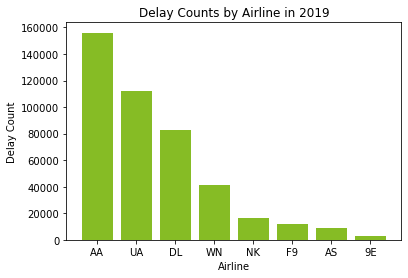

In [12]:
delay_counts = df_model.groupby('OP_CARRIER')['Delay'].size()

delay_counts = delay_counts.sort_values(ascending=False)

x_values = delay_counts.index
y_values = delay_counts.values 

fig, ax = plt.subplots()

ax.bar(x_values, y_values, color='#86BC25')

ax.set_title('Delay Counts by Airline in 2019')
ax.set_xlabel('Airline')
ax.set_ylabel('Delay Count')

plt.show()

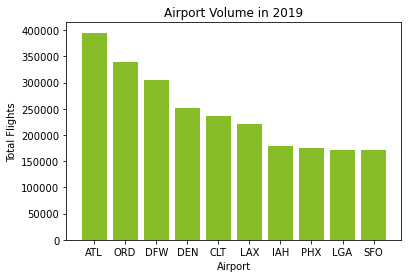

In [13]:
airport_counts = df_model.groupby('ORIGIN')['ORIGIN'].count()
big_airports = counts.sort_values(ascending=False).head(10)

x_values= big_airports.index
y_values= big_airports.values

fig, ax = plt.subplots()

ax.bar(x_values, y_values, color='#86BC25')

ax.set_title('Airport Volume in 2019')
ax.set_xlabel('Airport')
ax.set_ylabel('Total Flights')

plt.show()

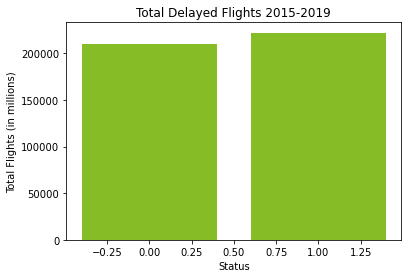

In [14]:
delay_binary = df_model['Delay'].value_counts()

# Set x_values to a list containing 0 and 1
x_values = [0, 1]

# Set y_values to the values in the delay_binary Series corresponding to 0 and 1
y_values = [delay_binary[0], delay_binary[1]]

fig, ax = plt.subplots()

ax.bar(x_values, y_values, color='#86BC25')

ax.set_title('Total Delayed Flights 2015-2019')
ax.set_xlabel('Status')
ax.set_ylabel('Total Flights (in millions)')

plt.show()

In [15]:
df_model['date'] = pd.to_datetime(df_model['FL_DATE'])

# Extract the year, month, and day of the week from the date field
df_model['year'] = df_model['date'].dt.year
df_model['month'] = df_model['date'].dt.month
df_model['day_of_week'] = df_model['date'].dt.dayofweek

# Drop the original date field
df_model = df_model.drop(columns=['date', 'FL_DATE'])
df_model= df_model[['year', 'month', 'day_of_week', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
                               'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME',
                               'AIR_TIME', 'DISTANCE', 'Delay']]

# df_test['date'] = pd.to_datetime(df_test['FL_DATE'])

# # Extract the year, month, and day of the week from the date field
# df_test['year'] = df_test['date'].dt.year
# df_test['month'] = df_test['date'].dt.month
# df_test['day_of_week'] = df_test['date'].dt.dayofweek

# # Drop the original date field
# df_test = df_test.drop(columns=['date', 'FL_DATE'])
# df_test = df_test[['year', 'month', 'day_of_week', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
#                                'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME',
#                                'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'Delay']]

<ipython-input-15-faaf2dcd9a75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['date'] = pd.to_datetime(df_model['FL_DATE'])
<ipython-input-15-faaf2dcd9a75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['year'] = df_model['date'].dt.year
<ipython-input-15-faaf2dcd9a75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [16]:
df_model.dropna(subset=['year', 'month', 'day_of_week'], inplace=True)
# df_test.dropna(subset=['year', 'month', 'day_of_week'], inplace=True)

In [17]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431386 entries, 226 to 7421639
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               431386 non-null  int64  
 1   month              431386 non-null  int64  
 2   day_of_week        431386 non-null  int64  
 3   OP_CARRIER         431386 non-null  object 
 4   OP_CARRIER_FL_NUM  431386 non-null  int64  
 5   ORIGIN             431386 non-null  object 
 6   DEST               431386 non-null  object 
 7   DEP_TIME           431386 non-null  float64
 8   TAXI_OUT           431386 non-null  float64
 9   WHEELS_OFF         431386 non-null  float64
 10  WHEELS_ON          431386 non-null  float64
 11  TAXI_IN            431386 non-null  float64
 12  ARR_TIME           431386 non-null  float64
 13  AIR_TIME           431386 non-null  float64
 14  DISTANCE           431386 non-null  float64
 15  Delay              431386 non-null  int32  
dtyp

In [ ]:
df_model 

In [18]:
df_model = pd.get_dummies(df_model, columns=['OP_CARRIER', 'ORIGIN', 'DEST'])
# df_test = pd.get_dummies(df_test, columns=['OP_CARRIER', 'ORIGIN', 'DEST'])

In [19]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431386 entries, 226 to 7421639
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               431386 non-null  int64  
 1   month              431386 non-null  int64  
 2   day_of_week        431386 non-null  int64  
 3   OP_CARRIER_FL_NUM  431386 non-null  int64  
 4   DEP_TIME           431386 non-null  float64
 5   TAXI_OUT           431386 non-null  float64
 6   WHEELS_OFF         431386 non-null  float64
 7   WHEELS_ON          431386 non-null  float64
 8   TAXI_IN            431386 non-null  float64
 9   ARR_TIME           431386 non-null  float64
 10  AIR_TIME           431386 non-null  float64
 11  DISTANCE           431386 non-null  float64
 12  Delay              431386 non-null  int32  
 13  OP_CARRIER_9E      431386 non-null  uint8  
 14  OP_CARRIER_AA      431386 non-null  uint8  
 15  OP_CARRIER_AS      431386 non-null  uint8  
 16 

# Modeling

Baseline Model (logistic regression)

In [20]:
df_model.shape

(431386, 41)

In [21]:
X = df_model.drop('Delay', axis=1)
y = df_model['Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [22]:
y.value_counts(normalize=True)

1    0.514625
0    0.485375
Name: Delay, dtype: float64

In [23]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [31]:
lr_basemodel = LogisticRegression(penalty = 'l2', C=1, class_weight='auto')
start_time = time.time()
lr_basemodel.fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Make predictions with the model
start_time = time.time()
predictions = lr_basemodel.predict(X_test)
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print("Training time: {} seconds".format(training_time))
print("Prediction time: {} seconds".format(prediction_time))


Training time: 2.0864882469177246 seconds
Prediction time: 0.014657258987426758 seconds


In [32]:
print('F1 score for the base model is: ',f1_score(y_test,predictions))

F1 score for the base model is:  0.6624121793323904


Tuning the basemodel

In [35]:
lr = LogisticRegression(max_iter = 500)
weights = np.linspace(0,0.99,100)
param = {'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1','l2'], 'solver':['liblinear']}
folds = KFold(n_splits = 5, shuffle=True)
model = GridSearchCV(estimator= lr, param_grid=param, scoring="f1", cv=folds, return_train_score=True)
model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             return_train_score=True, scoring='f1')

In [36]:
print(model.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:
y_pred_model= model.predict(X_test)

In [38]:
print('F1 score for the base model is: ',f1_score(y_test,y_pred_model))

F1 score for the base model is:  0.6622664290231701


In [30]:
confusion_matrix(y_test, y_pred_model)

array([[28116, 13806],
       [15552, 28804]], dtype=int64)

In [ ]:
lr = LogisticRegression(max_iter = 1000, solver='liblinear')
lr.fit(X_train, y_train)

In [ ]:
y_pred_model= lr.predict(X_test)

In [ ]:
print('F1 score for the base model is: ',f1_score(y_test,y_pred_model))

In [ ]:
print(model.best_params_)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
lr_model = LogisticRegression(penalty = 'l2', C=1, class_weight={0:0.8, 1:0.2})
lr_model.fit(X_train, y_train)

In [ ]:
y_pred_model = lr_model.predict(X_test)

In [ ]:
print('F1 score for the base model is: ',f1_score(y_test,y_pred_model))

In [ ]:
print(model.best_params_)

In [ ]:
confusion_matrix(y_test, y_pred_model)

In [ ]:
precision = precision_score(y_test, y_pred_model)
print(precision)

In [ ]:
recall = recall_score(y_test, y_pred_model)
print(recall)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_model)
print(accuracy)

In [ ]:
print('F1 score for the base model is: ',f1_score(y_test,y_pred_model))

In [ ]:
confusion_matrix(y_test, y_pred_basemodel)

In [ ]:
precision = precision_score(y_test, y_pred_basemodel)
print(precision)

In [ ]:
recall = recall_score(y_test, y_pred_basemodel)
print(recall)

Random Forest Starts Here:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [40]:
rf_basemodel = RandomForestClassifier(class_weight={0:0.48, 1:0.52}, max_depth=5, random_state=12)

start_time = time.time()
rf_basemodel.fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Make predictions with the model
start_time = time.time()
predictions = rf_basemodel.predict(X_test)
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print("Training time: {} seconds".format(training_time))
print("Prediction time: {} seconds".format(prediction_time))


Training time: 39.36286497116089 seconds
Prediction time: 1.0789365768432617 seconds


In [41]:
# y_rf_pred_basemodel = rf_basemodel.predict(X_test)
print('F1 score for the RandomForest base model is: ',f1_score(y_test,predictions))

F1 score for the RandomForest base model is:  0.6795116751473221


In [ ]:
precision = precision_score(y_test, predictions)
print(precision)

In [ ]:
recall = recall_score(y_test, predictions)
print(recall)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

In [43]:
rf_basemodel = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf_basemodel, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [44]:
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [47]:
rf_tuned = RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators= 200, random_state=12)

start_time = time.time()
rf_tuned.fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Make predictions with the model
start_time = time.time()
predictions = rf_tuned.predict(X_test)
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time
print('F1 score for the RandomForest base model is: ',f1_score(y_test,prediction))

F1 score for the RandomForest base model is:  0.6776334712480917


In [48]:
confusion_matrix(y_test, predictions)

array([[26592, 15330],
       [13923, 30433]], dtype=int64)

XGBoost 

In [49]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model_xg = xgb.XGBClassifier()
model_xg.fit(X_train, y_train)
predictions = model_xg.predict(X_test)

In [50]:
print('F1 score for the XGBoost base model is: ',f1_score(y_test,predictions))

F1 score for the RandomForest base model is:  0.7240380443068407


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 170.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 197.4min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=Non

In [54]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
model_xg1 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 180)
model_xg1.fit(X_train, y_train)
xg_predictions_tuned = model_xg.predict(X_test)
print('F1 score for the XGBoost tuned model is: ',f1_score(y_test,xg_predictions_tuned))

F1 score for the XGBoost tuned model is:  0.7240380443068407


In [57]:
confusion_matrix(y_test, xg_predictions_tuned)

array([[31878, 10044],
       [13487, 30869]], dtype=int64)